Plan: download character data; read data; arrange data in matrix; normalize and center data at 0; use numpy's SVD# 

In [1]:
import pandas as pd
from pandas_ods_reader import read_ods

path = "characters-aggregated/characters-aggregated.ods"
df = read_ods(path, 1)

df.head()

,unnamed.1,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,...,BAP259,BAP260,BAP261,BAP262,BAP263,BAP264,BAP265,BAP266,BAP267,BAP268
0,NCIS/1,86.5,82.1,74.8,7.9,31.1,78.1,37.9,20.6,55.7,...,38.4,57.9,21.1,64.2,23.4,29.4,76.7,32.8,81.9,11.5
1,NCIS/2,18.5,88.2,24.3,14.4,13.1,40.4,69.7,73.3,48.7,...,54.8,83.3,84.5,32.1,42.1,64.7,69.2,34.3,70.4,34.3
2,NCIS/3,16.0,86.3,11.9,64.8,35.9,61.5,15.5,70.2,60.2,...,18.9,75.2,93.7,49.6,36.0,31.5,22.3,15.9,78.8,13.2
3,NCIS/4,63.5,64.7,29.1,34.1,24.5,84.2,7.1,49.3,14.1,...,64.6,55.6,49.2,74.1,59.7,51.4,12.4,29.8,79.1,15.6
4,NCIS/5,68.6,32.4,42.1,39.8,71.5,67.0,16.8,44.8,21.2,...,73.8,39.4,36.7,71.5,61.4,45.3,67.5,33.7,76.2,24.8


In [ ]:
df.shape

The codebook.html file tells you the character names and "universe" listed above as "unnamed.1".

In [2]:
codebookmaps = pd.read_html("characters-aggregated/codebook.html")
character_map, bap_map = codebookmaps[0], codebookmaps[1]

In [ ]:
character_map.head()
#bap_map.head()

Add a "name" column that includes the character names:

In [3]:
df2 = df.copy()

def add_character_name(row):
    return tuple(character_map[character_map['ID'] == row['unnamed.1']]['Character display name'])[0]

df2['name'] = df2.apply(lambda row: add_character_name(row), axis=1)

df2.head()

,unnamed.1,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,...,BAP260,BAP261,BAP262,BAP263,BAP264,BAP265,BAP266,BAP267,BAP268,name
0,NCIS/1,86.5,82.1,74.8,7.9,31.1,78.1,37.9,20.6,55.7,...,57.9,21.1,64.2,23.4,29.4,76.7,32.8,81.9,11.5,Leroy Jethro Gibbs
1,NCIS/2,18.5,88.2,24.3,14.4,13.1,40.4,69.7,73.3,48.7,...,83.3,84.5,32.1,42.1,64.7,69.2,34.3,70.4,34.3,Anthony DiNozzo
2,NCIS/3,16.0,86.3,11.9,64.8,35.9,61.5,15.5,70.2,60.2,...,75.2,93.7,49.6,36.0,31.5,22.3,15.9,78.8,13.2,Abby Sciuto
3,NCIS/4,63.5,64.7,29.1,34.1,24.5,84.2,7.1,49.3,14.1,...,55.6,49.2,74.1,59.7,51.4,12.4,29.8,79.1,15.6,Donald Mallard
4,NCIS/5,68.6,32.4,42.1,39.8,71.5,67.0,16.8,44.8,21.2,...,39.4,36.7,71.5,61.4,45.3,67.5,33.7,76.2,24.8,Timothy McGee


In [ ]:
print(df2.columns)

The emoji traits are BAP235 - BAP266, we can take those out (for now at least):

In [4]:
def drop_emoji_columns(df1):
    rangeset = set([str(i) for i in range(235,267)])
    for column_title in df1.columns:
        if column_title[-3:] in rangeset:
            df1 = df1.drop(column_title, 1)
        else:
            pass
    return df1

df2 = drop_emoji_columns(df2)
df2.shape

(800, 238)

In [ ]:
df2.head()

In [37]:
import json
# === === Helper functions === ===
def write_json(data, filename):
    with open(filename,"w") as f:
        json.dump(data,f)
    return None
def get_json(filename):
    with open(filename) as f:
        jsonobj = json.load(f)
    return jsonobj

In [5]:
def make_column_dict(df1,map1):
    column_dict = {}
    for column_title in df1.columns:
        if 'BAP' in column_title:
            traits = map1[map1['ID'] == column_title]
            new_title = tuple(traits['low/left anchor'])[0]+"<->"+tuple(traits['high/right anchor'])[0]
            column_dict[column_title] = new_title
    return column_dict

make_column_dict(df2,bap_map)

{'BAP1': 'playful<->serious',
 'BAP2': 'shy<->bold',
 'BAP3': 'cheery<->sorrowful',
 'BAP4': 'masculine<->feminine',
 'BAP5': 'charming<->awkward',
 'BAP6': 'lewd<->tasteful',
 'BAP7': 'intellectual<->physical',
 'BAP8': 'strict<->lenient',
 'BAP9': 'refined<->rugged',
 'BAP10': 'trusting<->suspicious',
 'BAP11': 'innocent<->worldly',
 'BAP12': 'artistic<->scientific',
 'BAP13': 'stoic<->expressive',
 'BAP14': 'cunning<->honorable',
 'BAP15': 'orderly<->chaotic',
 'BAP16': 'normal<->weird',
 'BAP17': 'competitive<->cooperative',
 'BAP18': 'tense<->relaxed',
 'BAP19': 'brave<->careful',
 'BAP20': 'spiritual<->skeptical',
 'BAP21': 'unlucky<->fortunate',
 'BAP22': 'ferocious<->pacifist',
 'BAP23': 'modest<->flamboyant',
 'BAP24': 'dominant<->submissive',
 'BAP25': 'forgiving<->vengeful',
 'BAP26': 'wise<->foolish',
 'BAP27': 'impulsive<->cautious',
 'BAP28': 'loyal<->traitorous',
 'BAP29': 'creative<->conventional',
 'BAP30': 'curious<->apathetic',
 'BAP31': 'rude<->respectful',
 'BAP32'

In [38]:
write_json(make_column_dict(df2,bap_map),"bap_map.json")

In [6]:
df2.rename(columns=make_column_dict(df2,bap_map), inplace=True)
df2.head()

,unnamed.1,playful<->serious,shy<->bold,cheery<->sorrowful,masculine<->feminine,charming<->awkward,lewd<->tasteful,intellectual<->physical,strict<->lenient,refined<->rugged,...,abstract<->concrete,formal<->intimate,resolute<->wavering,deep<->shallow,valedictorian<->drop out,minimalist<->pack rat,trash<->treasure,stinky<->fresh,legit<->scrub,name
0,NCIS/1,86.5,82.1,74.8,7.9,31.1,78.1,37.9,20.6,55.7,...,82.8,24.8,14.1,21.7,25.5,15.1,88.3,81.9,11.5,Leroy Jethro Gibbs
1,NCIS/2,18.5,88.2,24.3,14.4,13.1,40.4,69.7,73.3,48.7,...,52.7,67.8,38.6,53.7,58.1,62.9,75.6,70.4,34.3,Anthony DiNozzo
2,NCIS/3,16.0,86.3,11.9,64.8,35.9,61.5,15.5,70.2,60.2,...,23.1,78.9,28.5,17.8,19.0,67.5,92.0,78.8,13.2,Abby Sciuto
3,NCIS/4,63.5,64.7,29.1,34.1,24.5,84.2,7.1,49.3,14.1,...,56.1,21.2,24.4,16.5,5.0,37.2,93.6,79.1,15.6,Donald Mallard
4,NCIS/5,68.6,32.4,42.1,39.8,71.5,67.0,16.8,44.8,21.2,...,75.1,31.6,41.8,32.2,13.6,50.9,80.8,76.2,24.8,Timothy McGee


From the codebook: "The rating was made by moving the slider scale to any value 1 - 100. Where 1 = slider at furthest left position to 100 = slider at furthest right position (50 = centered starting position)."

So I think we need to change this scale to -1,1 with 50=0 for SVD and semantic differential.

There's also the issue of some characters having few ratings and some having high variability across the raters; we might want to exclude this, which info can be found in sheets 2 and 3 of the .ods file.

For now I am treating all characters the same.

In [26]:
df3 = df2.copy()
df3 = df3.drop('hard<->soft',axis=1)
df3.shape

df3.shape

(800, 236)

In [ ]:
#column_titles = set([x for x in df2.columns if '<->' in x][:5])
#print(column_titles)

In [27]:


# to normalize and center at 0... scores between 50, 100 should be (x - 50)/50, e.g. 86.5 --> 36.5 --> 0.73...
# scores between 0, 49 should be -1*((50 - x)/50), e.g. 16 --> 34 --> 0.68 --> -0.68

column_titles = set([x for x in df3.columns if '<->' in x])
#print(column_titles)

def normalize_scores(score):
    if score >= 50:
        new_score = (score - 50.0)/50.0
    else:
        new_score = (-1)*(50.0 - score)/50.0
    return new_score

def normalize(df):
    for i in range(0,800):
        for column_title in column_titles:
            # i is the row
            #print(i, column_title, df.iloc[i, df.columns.get_loc(column_title)])
            
            try:
                score = df.iloc[i, df.columns.get_loc(column_title)]
                new_score = normalize_scores(score)
                
                if abs(new_score) >= 1:
                    print(i, column_title, df.iloc[i, df.columns.get_loc(column_title)], new_score)

                df.iloc[i, df.columns.get_loc(column_title)] = new_score
                
            except:
                print(i, column_title, df.iloc[i, df.columns.get_loc(column_title)],
                      type(df.iloc[i, df.columns.get_loc(column_title)]))
            
    return df
            
        
        
df4 = normalize(df3)


In [28]:
df4.shape

(800, 236)

In [29]:
df4

,unnamed.1,playful<->serious,shy<->bold,cheery<->sorrowful,masculine<->feminine,charming<->awkward,lewd<->tasteful,intellectual<->physical,strict<->lenient,refined<->rugged,...,abstract<->concrete,formal<->intimate,resolute<->wavering,deep<->shallow,valedictorian<->drop out,minimalist<->pack rat,trash<->treasure,stinky<->fresh,legit<->scrub,name
0,NCIS/1,0.730,0.642,0.496,-0.842,-0.378,0.562,-0.242,-0.588,0.114,...,0.656,-0.504,-0.718,-0.566,-0.490,-0.698,0.766,0.638,-0.770,Leroy Jethro Gibbs
1,NCIS/2,-0.630,0.764,-0.514,-0.712,-0.738,-0.192,0.394,0.466,-0.026,...,0.054,0.356,-0.228,0.074,0.162,0.258,0.512,0.408,-0.314,Anthony DiNozzo
2,NCIS/3,-0.680,0.726,-0.762,0.296,-0.282,0.230,-0.690,0.404,0.204,...,-0.538,0.578,-0.430,-0.644,-0.620,0.350,0.840,0.576,-0.736,Abby Sciuto
3,NCIS/4,0.270,0.294,-0.418,-0.318,-0.510,0.684,-0.858,-0.014,-0.718,...,0.122,-0.576,-0.512,-0.670,-0.900,-0.256,0.872,0.582,-0.688,Donald Mallard
4,NCIS/5,0.372,-0.352,-0.158,-0.204,0.430,0.340,-0.664,-0.104,-0.576,...,0.502,-0.368,-0.164,-0.356,-0.728,0.018,0.616,0.524,-0.504,Timothy McGee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,MCU/11,0.854,0.896,0.734,-0.854,-0.072,-0.126,0.094,-0.858,0.212,...,0.258,-0.356,-0.572,-0.116,-0.072,-0.030,-0.428,-0.454,0.046,Thanos
796,MCU/12,0.504,0.678,-0.052,0.400,-0.648,0.692,-0.450,-0.482,-0.588,...,0.336,-0.348,-0.560,-0.378,-0.792,-0.410,0.660,0.596,-0.610,Peggy Carter
797,MCU/13,-0.478,0.748,0.276,-0.094,-0.602,-0.070,-0.654,0.106,-0.340,...,-0.494,-0.110,0.072,-0.198,0.108,-0.004,0.522,0.320,-0.230,Loki
798,MCU/14,0.008,0.396,0.124,-0.622,-0.210,0.224,0.400,-0.044,0.374,...,0.234,0.034,-0.362,-0.224,0.134,-0.220,0.198,0.210,-0.282,Hawkeye


In [30]:
df4 = df4.drop('unnamed.1',axis=1)
df4 = df4.drop('name',axis=1)
df4.shape

(800, 234)

In [ ]:
dfsmall = df4.head().iloc[:, : 5]

dfsmall = dfsmall.drop('unnamed.1',axis=1)

In [ ]:
dfsmall = dfsmall.to_numpy()

In [31]:
df4np = df4.to_numpy()

In [ ]:
dfsmall

In [ ]:

#write_json(df4.to_dict(),"character_space_dict_05-12-21.json")

In [16]:
import numpy as np
from numpy import linalg
from numpy.linalg import svd

def svd(X):
  # Data matrix X, X doesn't need to be 0-centered
  n, m = X.shape
  # Compute full SVD
  U, Sigma, Vh = np.linalg.svd(X, 
      full_matrices=False, # It's not necessary to compute the full matrix of U or V
      compute_uv=True)
  # Transform X with SVD components
  X_svd = np.dot(U, np.diag(Sigma))
  return X_svd

#svd(dfsmall)

In [32]:
firstpass = svd(df4np)

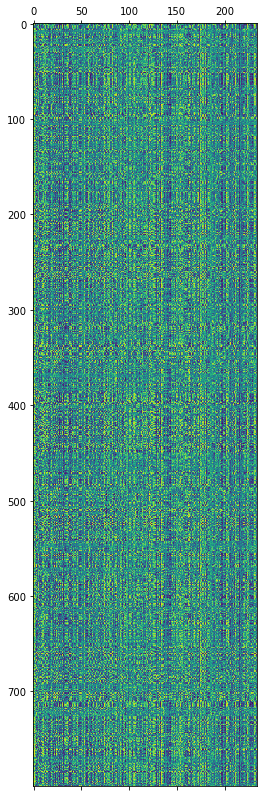

In [35]:
matplotlib.pyplot.matshow(df4np)

In [33]:
firstpass

array([[-6.87730417e+00,  1.05202258e+00, -1.35522610e+00, ...,
         6.06655918e-02,  2.85972412e-02,  1.70609459e-02],
       [-1.05100880e+00,  2.81475191e+00,  4.10546118e+00, ...,
         1.58776724e-02,  6.59447208e-02, -9.97141585e-03],
       [-3.35910911e+00,  7.86661945e-01,  5.84815898e+00, ...,
         2.43949770e-02,  3.77221256e-03,  2.76685698e-02],
       ...,
       [-5.42888518e-01,  5.90912065e+00,  1.90099254e+00, ...,
         2.11683184e-02,  1.09994882e-02,  2.96852820e-02],
       [-2.96521874e+00,  2.64026975e-01,  8.91249018e-01, ...,
        -7.50530241e-02, -3.89408311e-02,  8.74182724e-03],
       [ 1.75906081e+00,  2.54653871e+00,  5.72527535e+00, ...,
        -1.92422651e-02, -3.23062283e-02,  2.73828648e-02]])

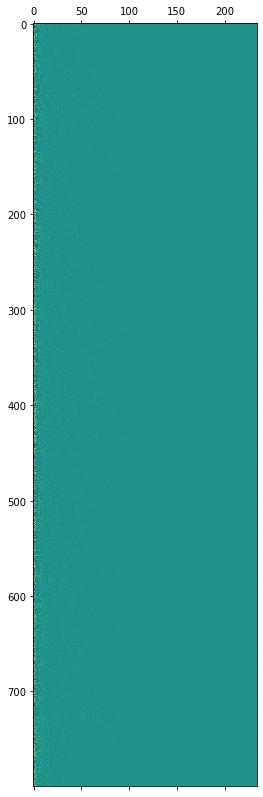

In [34]:
import matplotlib
from matplotlib import pyplot

#matplotlib.pyplot.matshow(svd(dfsmall))
matplotlib.pyplot.matshow(firstpass)